# Support Vector Machines

One of the most successful learning method historically, (but now getting superceded by newer techniques!): 
- There is a principle derivation for the method
- Nice optimisation package to do so
- Intuitive understanding of the method


Advantages of SVM
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

Disadvantages of SVM
- Works well only for small data sets - samples less than 10^6
- If the number of features is much greater than the number of samples, the method is likely to give poor performances.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation 

## SVM Goal

"The goal of a support vector machine is to find  the optimal separating hyperplane which maximizes the margin of the training data." 

So lets understand the concept of Margin

## Concept of  Margins

Given a two dimensional data space and linearly separable set of points, which line should I choose?

![](img/margins.png)

We would should choose a classification line which would provide maximum distance from the nearest point to the line. This classification line is likely to provide us with best possible generalization line. This concept of choosing the largest distance is called **Fat Margins**.

---


## Building Intution on SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 6)

In [3]:
from ipywidgets import interact

## Finding Linear Separation

Lets see an example of this in a two-dimensional space

In [187]:
np.random.seed(1234)

In [205]:
def plot_points(p):
    X = np.r_[np.random.randn(p, 2) - [2, 2], np.random.randn(p, 2) + [2, 2]]
    y = [0] * p + [1] * p
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, s=40)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.show()

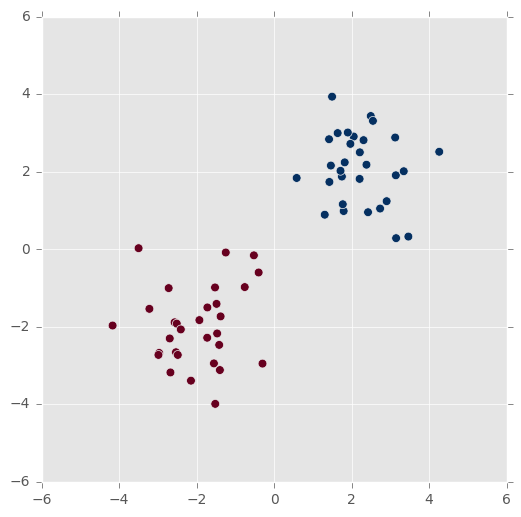

<function __main__.plot_points>

In [206]:
interact(plot_points, p=(20,40,2))

In [219]:
def plot_margins(p):
    X = np.r_[np.random.randn(p, 2) - [2, 2], np.random.randn(p, 2) + [2, 2]]
    y = [0] * p + [1] * p
    
    clf.fit(X,y)
    clf.predict(X)
    
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    x_line = np.linspace(-6, 6)
    y_line = a * x_line - (clf.intercept_[0]) / w[1]
    
    # plot the parallels to the separating hyperplane that pass through the support vectors
    b = clf.support_vectors_[0]
    y_down = a * x_line + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    y_up = a * x_line + (b[1] - a * b[0])
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(x_line, y_line, 'k-')
    plt.plot(x_line, y_down, 'k--')
    plt.plot(x_line, y_up, 'k--')
    
    # plot the boundaries
    x_min, x_max = -6, 6
    y_min, y_max = -6, 6
    step = 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    xxyy = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(xxyy)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.5)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, s=40)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.show()  

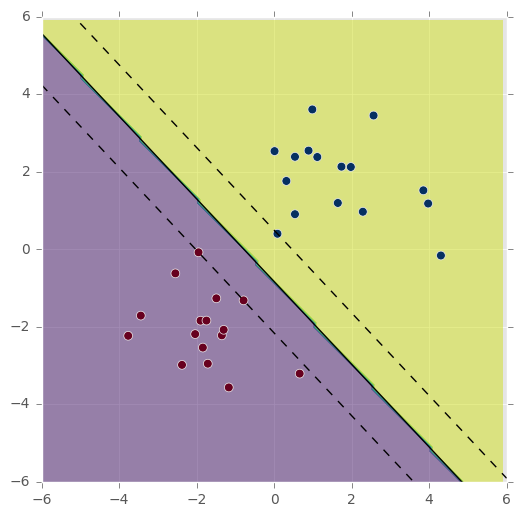

In [221]:
interact(plot_margins, p=(2,40))